In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('./drive/My Drive/')

In [ ]:
import keras
print(keras.__version__)

2.4.3


In [ ]:
import numpy as np
import re
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM,  Dropout
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [ ]:

dataset = pd.read_csv('/content/drive/MyDrive/data/Reviews.csv')
dataset.tail()

,Rating,Review
243492,1,fiyatına göre güzel
243493,1,Ürün kullanışlı iş görüyor fazlasıyla eşime al...
243494,1,"Hızlı Kargo, güzel ürün"
243495,1,telefon başarılı hızlı bir cihaz sadece beyaz...
243496,1,Urun cok guzel pazar gunu siparis verdim adana...


In [ ]:
dataset['Review'] = dataset['Review'].apply(lambda x: x.lower())
dataset['Review'] = dataset['Review'].apply(lambda x: re.sub("[,'\.!?();:$%&#]", '', x))
dataset['Review'] = dataset['Review'].apply(lambda x: x.strip())

In [ ]:
import nltk
nltk.download('stopwords')
WPT = nltk.WordPunctTokenizer()
stop_word_list = nltk.corpus.stopwords.words('turkish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def stopword_extraction(values):
    wordFilter = [word for word in values.split() if word not in stop_word_list]
    notStopword = " ".join(wordFilter)
    return notStopword
 
dataset['Review'] = dataset['Review'].apply(lambda x: stopword_extraction(x))

In [ ]:

target = dataset['Rating'].values.tolist()
data = dataset['Review'].values.tolist()

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y = np.array(label_encoder.fit_transform(target))


In [ ]:
seperation = int(len(data) * 0.80)
x_train, x_test = data[:seperation], data[seperation:]

y_train, y_test = Y[:seperation], Y[seperation:]

In [ ]:
dataset.shape

(243497, 2)

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

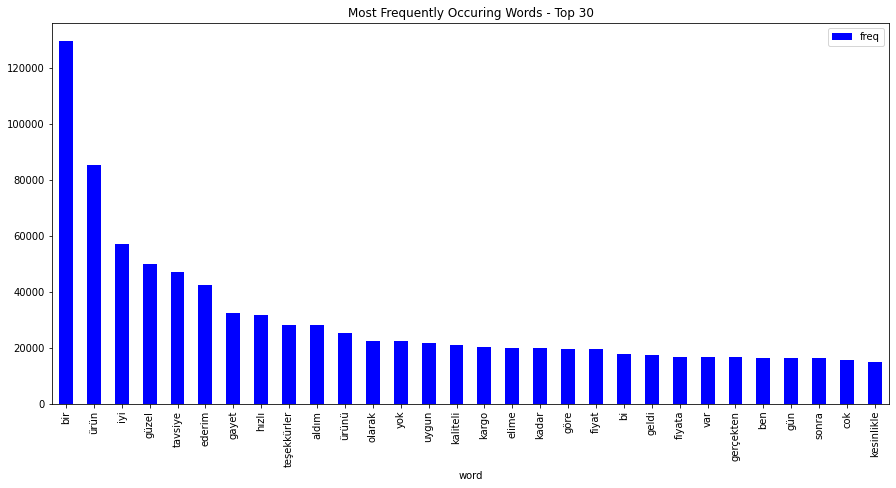

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(nltk.corpus.stopwords.words('turkish'))
words = cv.fit_transform(dataset.Review)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

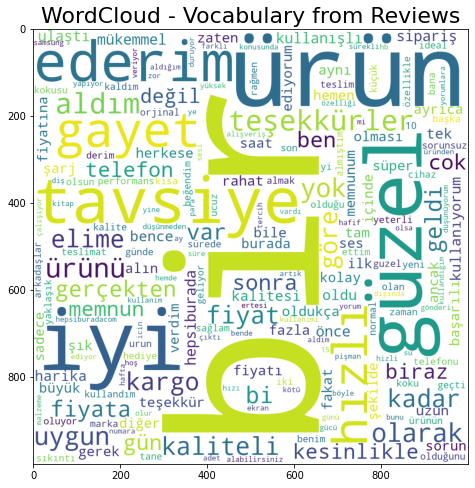

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

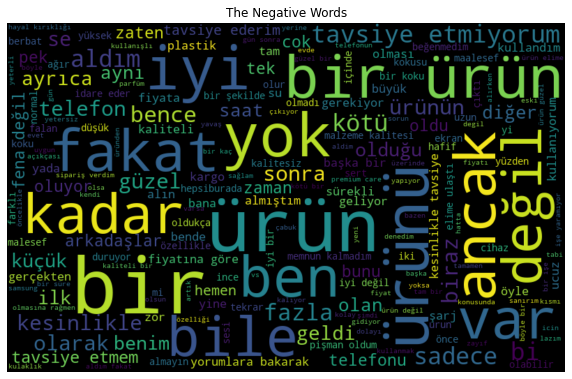

In [ ]:
negative_words =' '.join([text for text in dataset['Review'][dataset['Rating'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

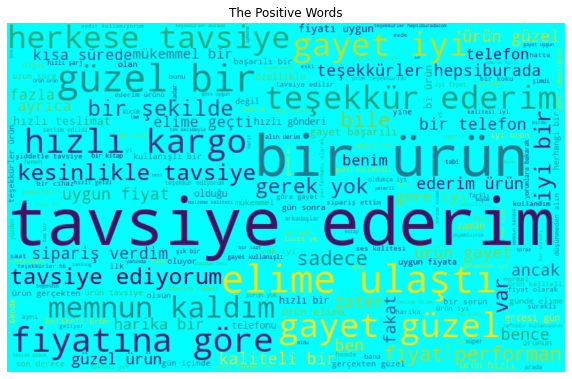

In [ ]:
positive_words =' '.join([text for text in  dataset['Review'][dataset['Rating'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [ ]:

num_words = 15000

tokenizer = Tokenizer(num_words=num_words)

In [ ]:

tokenizer.fit_on_texts(data)

In [ ]:

import pickle

with open('turkish_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:

with open('turkish_tokenizer.pickle', 'rb') as handle:
    turkish_tokenizer = pickle.load(handle)

In [ ]:

x_train_tokens = turkish_tokenizer.texts_to_sequences(x_train)

In [ ]:
x_train[500]

'ürün sipariş verdim 2 gün içinde elime ulaştı zaman kullanışlı bi ürün once mouse dan almıştımbu yüzden tereddütsüz aldım alacak olanlara öneririm'

In [ ]:
x_train_tokens[500]

[2,
 41,
 81,
 21,
 26,
 87,
 17,
 38,
 108,
 36,
 47,
 2,
 758,
 539,
 231,
 328,
 1357,
 10,
 293,
 542,
 367]

In [ ]:
x_test_tokens = turkish_tokenizer.texts_to_sequences(x_test)


In [ ]:
x_test[100]

'ben tohumların hepsini bir kerede ekmedim aynı paketten çıkan tohumlardan 3ye ekiyorum 4 ye ekecek tohum kaldı talimatlara uyup ilk ektikten sonra yazıldığı kadar su verip 4 gün bekleyince bol bol çim çıkıyor neredeyse bir karışda uzuyor seferinde ektiğim kadar çimde kedime 1 ay yetti ufak bir kaba ekip çim çıkınca koyun kedinizin yanına 3-4 ekimle 3-4 ay idare ediyor pakette gönderilen toprakda 3 ye tohum ekmeme rağmen hala verimli seferinde eski kuruyan çimleri köklerini ayıklayıp aynı toprağa ekebiliyorum'

In [ ]:
x_test_tokens[100]

[27,
 1313,
 1,
 8668,
 76,
 3219,
 458,
 82,
 388,
 11091,
 575,
 8989,
 59,
 28,
 3925,
 18,
 160,
 838,
 82,
 26,
 958,
 958,
 7100,
 360,
 478,
 1,
 8982,
 2840,
 18,
 14736,
 33,
 161,
 5219,
 260,
 1,
 1172,
 10303,
 7100,
 4787,
 3983,
 2222,
 42,
 82,
 42,
 82,
 161,
 652,
 148,
 3140,
 2537,
 42,
 388,
 11091,
 121,
 326,
 1978,
 2840,
 279,
 76]

In [ ]:
"""
We will add Padding for our comments.
In RNN, we give predefined-sized inputs. But our comments consist of different sized inputs, so we need to define
a input size for comments. If size > comment, then add 0s for the gap, otherwise trim the comment.
"""

num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]


num_tokens = np.array(num_tokens)
num_tokens.shape

(243497,)

In [ ]:

np.mean(num_tokens)

17.484535743766862

In [ ]:

np.max(num_tokens)

241

In [ ]:

np.argmax(num_tokens)

213583

In [ ]:

max_tokens = np.mean(num_tokens) + 2*np.std(num_tokens) 
max_tokens = int(max_tokens)
max_tokens

50

In [ ]:

np.sum(num_tokens < max_tokens) / len(num_tokens) * 100  


95.92602783607191

In [ ]:

x_train_pad = pad_sequences(x_train_tokens, maxlen=max_tokens)
x_test_pad = pad_sequences(x_test_tokens, maxlen=max_tokens)

In [ ]:

print(x_train_pad.shape)
print(x_test_pad.shape)

(194797, 50)
(48700, 50)


In [ ]:

idx = turkish_tokenizer.word_index


inverse_map = dict(zip(idx.values(), idx.keys()))
first_five = {k: inverse_map[k] for k in sorted(inverse_map.keys())[:5]}
first_five

{1: 'bir', 2: 'ürün', 3: 'iyi', 4: 'güzel', 5: 'tavsiye'}

In [ ]:
def convert_tokens_to_string(tokens):
    words = [inverse_map[token] for token in tokens if token != 0]
    text = ' '.join(words)
    return text

In [ ]:
model = Sequential()

In [ ]:
embedding_size = 50

In [ ]:

model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))

In [ ]:

model.add(LSTM(units=16, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=8, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=4, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
from keras.optimizers import Adam

optimizer = Adam(lr=1e-3)

In [ ]:

model.compile(loss='binary_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 50, 50)            750000    
_________________________________________________________________
lstm (LSTM)                  (None, 50, 16)            4288      
_________________________________________________________________
dropout (Dropout)            (None, 50, 16)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 8)             800       
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 8)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 4)                 208       
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0

In [ ]:

history = model.fit(x_train_pad, y_train,validation_split=0.25, epochs=25, batch_size=256)


Epoch 1/25
571/571 [==============================] - 22s 22ms/step - loss: 0.2774 - accuracy: 0.9364 - val_loss: 0.1105 - val_accuracy: 0.9622
Epoch 2/25
571/571 [==============================] - 12s 20ms/step - loss: 0.1160 - accuracy: 0.9623 - val_loss: 0.0986 - val_accuracy: 0.9655
Epoch 3/25
571/571 [==============================] - 12s 20ms/step - loss: 0.0868 - accuracy: 0.9746 - val_loss: 0.1007 - val_accuracy: 0.9649
Epoch 4/25
571/571 [==============================] - 11s 20ms/step - loss: 0.0678 - accuracy: 0.9816 - val_loss: 0.1163 - val_accuracy: 0.9640
Epoch 5/25
571/571 [==============================] - 11s 20ms/step - loss: 0.0530 - accuracy: 0.9862 - val_loss: 0.1398 - val_accuracy: 0.9627
Epoch 6/25
571/571 [==============================] - 11s 20ms/step - loss: 0.0440 - accuracy: 0.9888 - val_loss: 0.1547 - val_accuracy: 0.9609
Epoch 7/25
571/571 [==============================] - 11s 19ms/step - loss: 0.0361 - accuracy: 0.9910 - val_loss: 0.1745 - val_accuracy:

In [ ]:

result = model.evaluate(x_test_pad, y_test)

result

1522/1522 [==============================] - 8s 5ms/step - loss: 0.3835 - accuracy: 0.9416


[0.3835274279117584, 0.9416221976280212]

In [ ]:
accuracy = (result[1]) * 100
accuracy

94.16221976280212

In [ ]:

model.save('lstm_nlp1.h5')

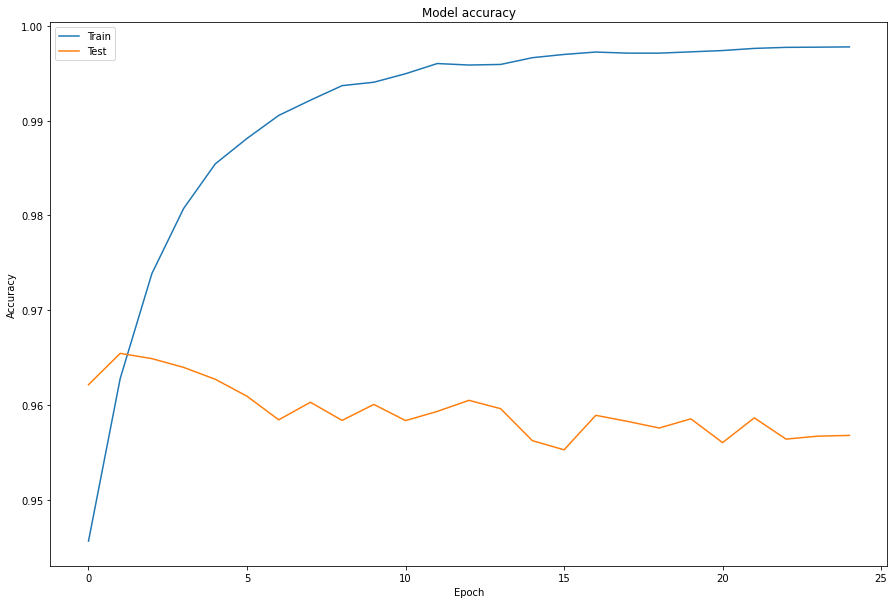

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

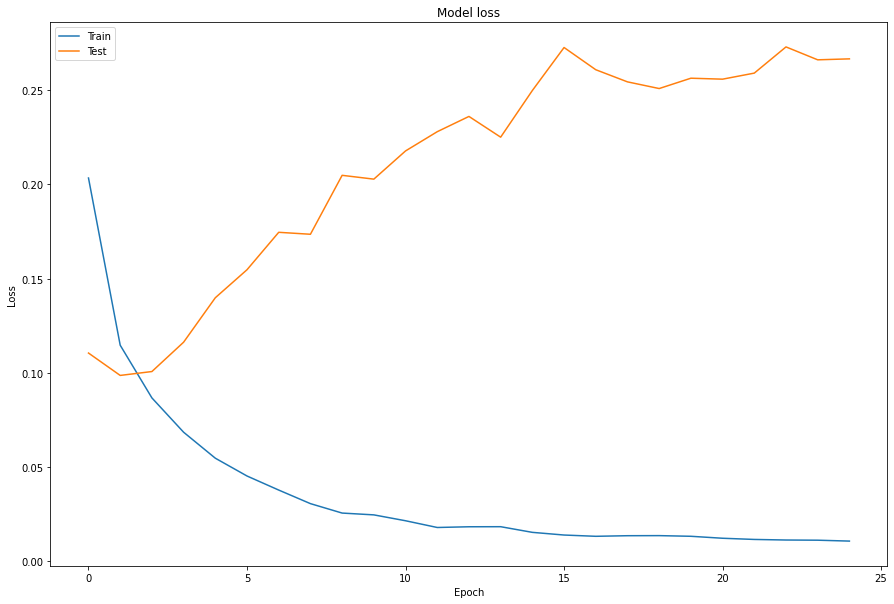

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


model1 = RandomForestClassifier()
model1.fit(x_train_pad, y_train)

y_pred = model1.predict(x_test_pad)

print("Training Accuracy :", model1.score(x_train_pad, y_train))
print("Validation Accuracy :", model1.score(x_test_pad, y_test))



cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9995328470150978
Validation Accuracy : 0.943141683778234
[[   60  2739]
 [   30 45871]]


In [ ]:
text1 = "büyük bir hayal kırıklığı yaşadım bu ürün bu markaya yakışmamış"
text2 = "tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı tavsiye etmem :("
text3 = "hiç resimde gösterildiği gibi değil..."
text4 = "kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım teşekkürler"
text5 = "hiç bu kadar kötü bir satıcıya denk gelmemiştim. ürünü iade ediyorum"
text6 = "tam bir fiyat performans ürünü"
text7 = "güzel bir ürün değil"
texts = [text1, text2,text3,text4,text5,text6,text7]


In [ ]:

tokens = turkish_tokenizer.texts_to_sequences(texts)
tokens

[[83, 1, 965, 2228, 1512, 8322, 2, 8322, 1697, 12245],
 [513, 48, 67, 16, 7461, 399, 25, 9398, 2, 5, 992],
 [1077, 6170, 35],
 [153, 679, 7479, 67, 226, 80, 320, 9],
 [8322, 18, 153, 1, 1720, 1158, 11, 616, 70],
 [55, 1, 20, 88, 11],
 [4, 1, 2, 35]]

In [ ]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens)


In [ ]:
model.predict(tokens_pad)

array([[2.2721791e-04],
       [1.0777729e-01],
       [4.0279818e-03],
       [9.9984682e-01],
       [1.0773671e-03],
       [9.9989557e-01],
       [8.8665456e-01]], dtype=float32)

In [ ]:
for i in model.predict(tokens_pad):
  if i < 0.5:
    print("olumsuz")
  elif i >= 0.5:
    print("olumlu")

olumsuz
olumsuz
olumsuz
olumlu
olumsuz
olumlu
olumlu
